Credits: https://www.youtube.com/watch?v=F2_dgQQQa_w

## Imports

In [34]:
import torch 
from torchvision import datasets, transforms 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import torch.nn as nn 
import torch.nn.functional as F 

## Load Dataset

In [3]:
mnist_train = datasets.MNIST(root = "/home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST",download = False, train = True,transform = transforms.ToTensor())
mnist_test = datasets.MNIST(root = "/home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST",download = False, train = False, transform = transforms.ToTensor())

In [4]:
cifar10_train = datasets.CIFAR10(root = "/home/manju838/coding/env/pytorch_env/Datasets",download = True, train = True, transform = transforms.ToTensor())
cifar10_test = datasets.CIFAR10(root = "/home/manju838/coding/env/pytorch_env/Datasets", download = True, train = False, transform = transforms.ToTensor())

170499072it [14:43, 192935.39it/s]                               
Extracting /home/manju838/coding/env/pytorch_env/Datasets/cifar-10-python.tar.gz to /home/manju838/coding/env/pytorch_env/Datasets
Files already downloaded and verified


## To train and test for only selected labels(I take 3 and 8 for MNIST dataset)

In [5]:
reduced_label = {3:0, 8:1}

In [6]:
mnist_train = [(img, reduced_label[lbl]) for img,lbl in mnist_train if lbl in [3,8]] 
mnist_test = [(img, reduced_label[lbl]) for img,lbl in mnist_test if lbl in [3,8]]

In [12]:
print(len(mnist_train), len(mnist_test))
print(mnist_train[0])
print("----------")
print(len(mnist_train))
print("----------")
print(mnist_train[0][0].shape)

11982 1984
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0

## Set to Batch training - 

In [13]:
mnist_trainloader = torch.utils.data.DataLoader(mnist_train, batch_size = 10, shuffle = True)
mnist_testloader = torch.utils.data.DataLoader(mnist_test, batch_size = 10, shuffle = True)

In [14]:
cifar10_trainloader = torch.utils.data.DataLoader(cifar10_train, batch_size = 16, shuffle = True)
cifar10_testloader = torch.utils.data.DataLoader(cifar10_test, batch_size = 16, shuffle = True)

## Visualise Dataset

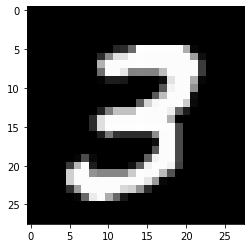

In [17]:
plt.imshow(mnist_train[0][0].reshape(28,28), cmap = 'gray')
plt.show()

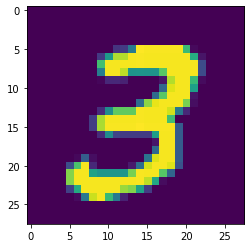

In [18]:
plt.imshow(mnist_train[0][0].reshape(28,28))
plt.show()

## Creating a Model

### Convolutions Formula
### (n+2p-f)/s + 1
### where n is size of input image
###       p is no. of padding
###       f is size of kernel
###       s is no. of strides

In [42]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 9, kernel_size = 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels = 9, out_channels = 18,kernel_size = 3, stride = 1, padding = 1)
        self.mp1 = nn.MaxPool2d(2) #torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
        self.mp2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(18*7*7, 32)
        self.fc2 = nn.Linear(32,2) #I considered only 2 output classes i.e 3,8
    
    def forward(self, x):
        x = self.mp1(torch.relu(self.conv1(x)))
        x = self.mp2(torch.relu(self.conv2(x)))
        x = torch.relu(self.fc1(x.view(-1,18*7*7)))
        x = self.fc2(x)
        return(x)

In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [44]:
model = CNN().to(device=device)

In [45]:
model

CNN(
  (conv1): Conv2d(1, 9, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(9, 18, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (mp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (mp2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=882, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [46]:
model(mnist_train[0][0].unsqueeze(0).to(device=device))

tensor([[-0.1854, -0.2281]], device='cuda:0', grad_fn=<AddmmBackward>)

I am getting some probability values as one hot vector,so model is working 

## Training

In [49]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [50]:
for epoch in range(10):
    for img,lbl in mnist_trainloader:
        img = img.to(device=device)
        lbl = lbl.to(device=device)
        y_pred = model(img)
        loss = criterion(y_pred, lbl)
        loss.backward() #Calculates the gradient
        optimizer.step() #Updates weights
        optimizer.zero_grad() #To prevet gradient accumulation
    
    if(epoch % 2 ==0): handle, opa, opb, m, n, k, &alpha, a, lda, b, ldb, &beta, c, ldc)
        model.eval()
        correct = 0
        total = 0
        for img,lbl in mnist_trainloader:
            img = img.to(device=device)
            lbl = lbl.to(device=device)
            y_pred = model(img)
            preds = torch.argmax(y_pred, 1)
            correct += (preds == lbl).sum()
            total += len(lbl)
        print(epoch, correct/total)


RuntimeError: CUDA error: CUBLAS_STATUS_EXECUTION_FAILED when calling `cublasSgemm( handle, opa, opb, m, n, k, &alpha, a, lda, b, ldb, &beta, c, ldc)`